In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file='/home/dfx-rick/Downloads/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model= InceptionV3(input_shape=(256,256,3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable= False
pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
folder= glob('/home/dfx-rick/Downloads/chest_xray/train/*')
x= Flatten()(pre_trained_model.output)

In [4]:
from tensorflow.keras.models import Model
pred= Dense(len(folder), activation='softmax')(x)

model=Model(inputs=pre_trained_model.input, outputs= pred)

In [5]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_set= ImageDataGenerator(rescale=1./255)
test_set=  ImageDataGenerator(rescale=1./255)

In [33]:
training= train_set.flow_from_directory('/home/dfx-rick/Downloads/chest_xray/train',
           target_size = (256, 256),
           batch_size= 32,
           class_mode='categorical')

                                   

Found 5216 images belonging to 2 classes.


In [32]:
test= test_set.flow_from_directory('/home/dfx-rick/Downloads/chest_xray/test',
           target_size = (256, 256),
           batch_size= 32,
           class_mode='categorical')




Found 624 images belonging to 2 classes.


In [34]:
r= model.fit(training, validation_data=test, epochs=5, steps_per_epoch=len(training), 
             validation_steps=len(test))

Epoch 1/5
163/163 [==============================] - 591s 4s/step - loss: 0.9098 - accuracy: 0.9233 - val_loss: 4.7690 - val_accuracy: 0.7532
Epoch 2/5
163/163 [==============================] - 528s 3s/step - loss: 0.2046 - accuracy: 0.9716 - val_loss: 3.8325 - val_accuracy: 0.7965
Epoch 3/5
163/163 [==============================] - 567s 3s/step - loss: 0.1793 - accuracy: 0.9783 - val_loss: 4.4455 - val_accuracy: 0.7756
Epoch 4/5
163/163 [==============================] - 587s 4s/step - loss: 0.1050 - accuracy: 0.9847 - val_loss: 6.2908 - val_accuracy: 0.7532
Epoch 5/5
163/163 [==============================] - 588s 4s/step - loss: 0.2526 - accuracy: 0.9770 - val_loss: 9.3005 - val_accuracy: 0.7308


PNEUMONIA


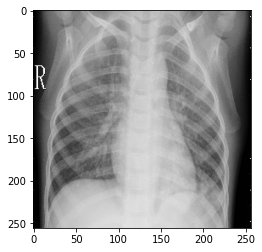

In [48]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
img= image.load_img('/home/dfx-rick/Downloads/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg',
                    target_size=(256, 256))
c= image.img_to_array(img)
c= np.expand_dims(c, axis=0)
img_data= preprocess_input(c)
classes= model.predict(img_data)
if classes[0][0]>classes[0][1]:
    print("NORMAL")
if classes[0][0]<classes[0][1]:
    print("PNEUMONIA")

#print(classes)
plt.imshow(img)

NORMAL


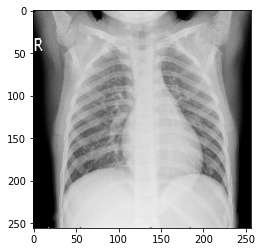

In [47]:
img= image.load_img('/home/dfx-rick/Downloads/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg',
                    target_size=(256, 256))
c= image.img_to_array(img)
c= np.expand_dims(c, axis=0)
img_data= preprocess_input(c)
classes= model.predict(img_data)
if classes[0][0]>classes[0][1]:
    print("NORMAL")
if classes[0][0]<classes[0][1]:
    print("PNEUMONIA")
#print(classes[0][0])
plt.imshow(img)

NORMAL


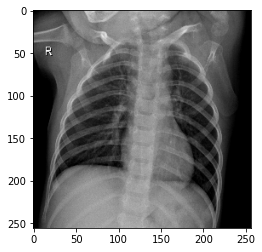

In [49]:
img= image.load_img('/home/dfx-rick/Downloads/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg',
                    target_size=(256, 256))
c= image.img_to_array(img)
c= np.expand_dims(c, axis=0)
img_data= preprocess_input(c)
classes= model.predict(img_data)
if classes[0][0]>classes[0][1]:
    print("NORMAL")
if classes[0][0]<classes[0][1]:
    print("PNEUMONIA")
#print(classes[0][0])
plt.imshow(img)



PNEUMONIA


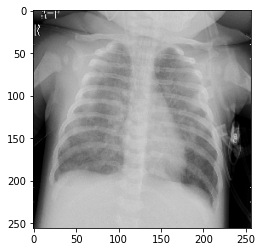

In [50]:
img= image.load_img('/home/dfx-rick/Downloads/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg',
                    target_size=(256, 256))
c= image.img_to_array(img)
c= np.expand_dims(c, axis=0)
img_data= preprocess_input(c)
classes= model.predict(img_data)
if classes[0][0]>classes[0][1]:
    print("NORMAL")
if classes[0][0]<classes[0][1]:
    print("PNEUMONIA")

#print(classes)
plt.imshow(img)